In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [35]:
data=pd.read_csv('/content/train.csv')

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data.shape

(891, 12)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
data['Age'].mean()

29.69911764705882

In [41]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [42]:
data['Embarked'].mode()[0]

'S'

In [43]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [44]:
data['Cabin_null']=np.where(data['Cabin'].isnull(),1,0)

In [45]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_null       0
dtype: int64

In [46]:
data=data.drop('Cabin',axis=1)

In [47]:
data['Cabin_null'].value_counts()

Cabin_null
1    687
0    204
Name: count, dtype: int64

In [48]:
encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])
data['Embarked']=encoder.fit_transform(data['Embarked'])

In [49]:
print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

Sex
1    577
0    314
Name: count, dtype: int64
Embarked
2    646
0    168
1     77
Name: count, dtype: int64


In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1


In [53]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [55]:
x=data.drop(['PassengerId','Name','Ticket','Survived'],axis=1)

In [56]:
y=data['Survived']

In [57]:
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Cabin_null
0         3    1  22.000000      1      0   7.2500         2           1
1         1    0  38.000000      1      0  71.2833         0           0
2         3    0  26.000000      0      0   7.9250         2           1
3         1    0  35.000000      1      0  53.1000         2           0
4         3    1  35.000000      0      0   8.0500         2           1
..      ...  ...        ...    ...    ...      ...       ...         ...
886       2    1  27.000000      0      0  13.0000         2           1
887       1    0  19.000000      0      0  30.0000         2           0
888       3    0  29.699118      1      2  23.4500         2           1
889       1    1  26.000000      0      0  30.0000         0           0
890       3    1  32.000000      0      0   7.7500         1           1

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
N

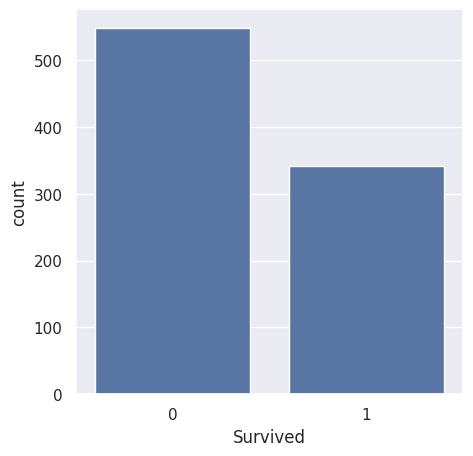

In [62]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=data)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

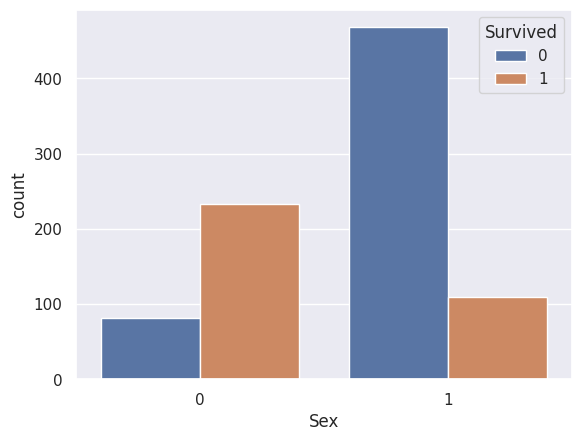

In [68]:
sns.countplot(x='Sex', hue='Survived', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

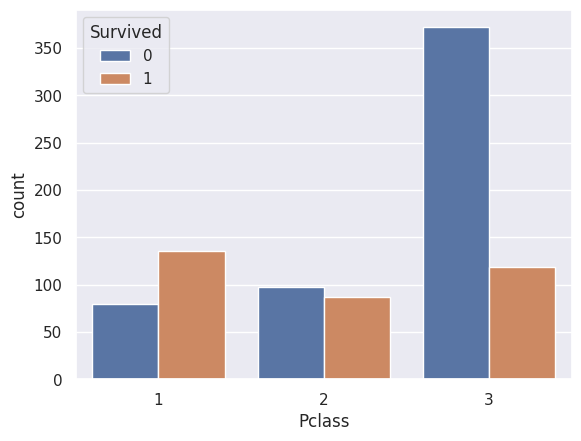

In [69]:
sns.countplot(x='Pclass', hue='Survived', data=data)

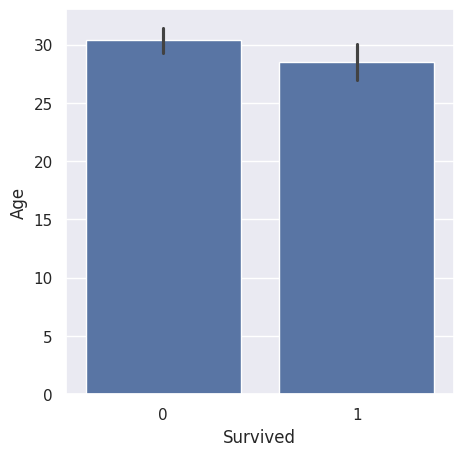

In [75]:
plt.figure(figsize=(5,5))
sns.barplot(x='Survived', y='Age', data=data)
plt.show()

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(891, 8) (712, 8) (179, 8)


In [59]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
train_prd=model.predict(x_train)
train_acc=accuracy_score(y_train,train_prd)
print(train_acc)

0.8047752808988764


In [61]:
test_prd=model.predict(x_test)
test_acc=accuracy_score(y_test,test_prd)
print(test_acc)

0.7877094972067039
